In [1]:
!pip install --upgrade open_spiel

     |████████████████████████████████| 4.4 MB 6.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


## Read and process the csv file

In [2]:
!git clone https://github.com/charmainehly/cs4246-group-project.git

Cloning into 'cs4246-group-project'...
remote: Enumerating objects: 458, done.
remote: Counting objects: 100% (458/458), done.
remote: Compressing objects: 100% (242/242), done.
remote: Total 458 (delta 174), reused 395 (delta 161), pack-reused 0
Receiving objects: 100% (458/458), 13.44 MiB | 17.31 MiB/s, done.
Resolving deltas: 100% (174/174), done.


In [3]:
from open_spiel.python.algorithms import fictitious_play
from open_spiel.python.egt import alpharank
from open_spiel.python.egt import alpharank_visualizer
from open_spiel.python.egt import heuristic_payoff_table
from open_spiel.python.egt import utils
import pyspiel

In [4]:
%cd cs4246-group-project/shapley/

/content/cs4246-group-project/shapley


In [5]:
columns = 'player,episode,method,goal_agents_with,total_good_agents_rewards_with,good_agents_rewards_with,goal_agents_without,total_good_agents_rewards_without,good_agents_rewards_without'.split(',')

## Experiments from model4 to model7
To run the experiments, <br>
Change the input file name and division size accordingly.



In [126]:
## Compare model 3 and 5; only idle(noop) is tested
import pandas as pd

# m3_df = pd.read_csv('Model #3/rewards/exp_x1/run_x1_idle_[0.8,_1.0,_1.2,_1.3]_0.csv')
m7_df = pd.read_csv('Model #6/run_1/rewards/exp_x1/run_x1_idle_[0.2,_1.0,_2.0,_1.3]_0.csv')
m7_dfr = pd.read_csv('Model #6/run_2/rewards/exp_x1/run_x1_idle_[0.2,_1.0,_2.0,_1.3]_0.csv')
m7_dfrp = pd.read_csv('Model #6/run_3/rewards/exp_x1/run_x1_idle_[0.2,_1.0,_2.0,_1.3]_0.csv')

# m3_df.columns = columns
m7_df.columns = columns
m7_dfr.columns = columns
m7_dfrp.columns = columns

In [127]:
import ast
import numpy as np
m7_with = []
m7_without = []
m7r_with = []
m7r_without = []
m7r_with = []
m7r_without = []
m7rp_with = []
m7rp_without = []

for i in range(m7_df.shape[0]):
    m7_with.append(np.array(ast.literal_eval(m7_df.loc[i,'good_agents_rewards_with'])[0][:-1]))
    m7_without.append(np.array(ast.literal_eval(m7_df.loc[i,'good_agents_rewards_without'])[0][:-1]))
    m7r_with.append(np.array(ast.literal_eval(m7_dfr.loc[i,'good_agents_rewards_with'])[0][:-1]))
    m7r_without.append(np.array(ast.literal_eval(m7_dfr.loc[i,'good_agents_rewards_without'])[0][:-1]))
    m7rp_with.append(np.array(ast.literal_eval(m7_dfrp.loc[i,'good_agents_rewards_with'])[0][:-1]))
    m7rp_without.append(np.array(ast.literal_eval(m7_dfrp.loc[i,'good_agents_rewards_without'])[0][:-1]))

In [128]:
m7_p1 = sum(m7_with[:1000]) / 1000
m7_p2 = sum(m7_with[1000:2000]) / 1000
m7_p3 = sum(m7_with[1000:]) / 1000

m7_payoff_tables = np.reshape([m7_p1,m7_p2,m7_p3],(3,3,5,5))

m7_p1 = sum(m7r_with[:1000]) / 1000
m7_p2 = sum(m7r_with[1000:2000]) / 1000
m7_p3 = sum(m7r_with[1000:]) / 1000


m7r_payoff_tables = np.reshape([m7_p1,m7_p2,m7_p3],(3,3,5,5))

m7_p1 = sum(m7rp_with[:1000]) / 1000
m7_p2 = sum(m7rp_with[1000:2000]) / 1000
m7_p3 = sum(m7rp_with[1000:]) / 1000

m7rp_payoff_tables = np.reshape([m7_p1,m7_p2,m7_p3],(3,3,5,5))

In [131]:
## model7, noop
payoff_tables = m7_payoff_tables
payoffs_are_hpt_format = utils.check_payoffs_are_hpt(payoff_tables)
strat_labels = utils.get_strat_profile_labels(payoff_tables,
                                              payoffs_are_hpt_format)

# Run AlphaRank
rhos, rho_m, pi, _, _ = alpharank.compute(payoff_tables, alpha=1e2)

# Report & plot results
alpharank.print_results(
    payoff_tables, payoffs_are_hpt_format, rhos=rhos, rho_m=rho_m, pi=pi)
utils.print_rankings_table(payoff_tables, pi, strat_labels)
m_network_plotter = alpharank_visualizer.NetworkPlot(
    payoff_tables, rhos, rho_m, pi, strat_labels, num_top_profiles=8)
m_network_plotter.compute_and_draw_network()

alpharank.sweep_pi_vs_alpha(payoff_tables, visualize=True)

Payoff tables:

[[[[0.08 0.16 0.25 0.26 0.31]
   [0.26 0.18 0.26 0.22 0.24]
   [0.3  0.3  0.19 0.2  0.21]
   [0.27 0.28 0.22 0.21 0.18]
   [0.2  0.17 0.14 0.13 0.09]]

  [[0.08 0.16 0.25 0.26 0.31]
   [0.26 0.18 0.26 0.22 0.24]
   [0.3  0.3  0.19 0.2  0.21]
   [0.27 0.28 0.22 0.21 0.18]
   [0.2  0.17 0.14 0.13 0.09]]

  [[0.08 0.16 0.25 0.26 0.31]
   [0.26 0.18 0.26 0.22 0.24]
   [0.3  0.3  0.19 0.2  0.21]
   [0.27 0.28 0.22 0.21 0.18]
   [0.2  0.17 0.14 0.13 0.09]]]


 [[[0.05 0.13 0.27 0.27 0.32]
   [0.3  0.26 0.31 0.29 0.27]
   [0.24 0.22 0.24 0.23 0.21]
   [0.18 0.19 0.14 0.15 0.16]
   [0.12 0.13 0.18 0.15 0.18]]

  [[0.05 0.13 0.27 0.27 0.32]
   [0.3  0.26 0.31 0.29 0.27]
   [0.24 0.22 0.24 0.23 0.21]
   [0.18 0.19 0.14 0.15 0.16]
   [0.12 0.13 0.18 0.15 0.18]]

  [[0.05 0.13 0.27 0.27 0.32]
   [0.3  0.26 0.31 0.29 0.27]
   [0.24 0.22 0.24 0.23 0.21]
   [0.18 0.19 0.14 0.15 0.16]
   [0.12 0.13 0.18 0.15 0.18]]]


 [[[0.18 0.31 0.47 0.53 0.61]
   [0.6  0.56 0.61 0.54 0.62]
   [0.59

/usr/local/lib/python3.7/dist-packages/open_spiel/python/egt/alpharank.py:242: RuntimeWarning: overflow encountered in exp
  result = (1 - np.exp(-u)) / (1 - np.exp(-m * u))


## Kuhn poker game

/usr/local/lib/python3.7/dist-packages/open_spiel/python/egt/alpharank.py:242: RuntimeWarning: overflow encountered in exp
  result = (1 - np.exp(-u)) / (1 - np.exp(-m * u))


Payoff tables:

[array([[[ 0.3 , -0.44, -0.35, -0.35],
        [-0.09, -0.76, -0.83, -0.21],
        [ 0.23, -0.54, -0.71, -0.46],
        [ 0.38, -0.42, -0.43, -0.44]],

       [[ 0.84, -0.08,  0.04, -0.06],
        [ 0.14,  0.27, -0.03,  0.02],
        [ 0.59, -0.33, -0.34, -0.28],
        [ 0.08, -0.38, -0.08, -0.76]],

       [[ 0.54,  0.57,  0.05,  0.48],
        [-0.05,  0.2 ,  0.12,  0.2 ],
        [ 0.33,  0.49,  0.14, -0.03],
        [ 0.27, -0.21,  0.28, -0.18]],

       [[ 1.03,  0.28,  0.49,  0.3 ],
        [-0.05,  0.08,  0.39,  0.2 ],
        [ 0.51,  0.01, -0.05, -0.33],
        [ 0.16,  0.04,  0.11, -0.15]]], dtype=float32), array([[[-0.05,  0.23, -0.22, -0.28],
        [ 0.85,  0.16,  0.49, -0.03],
        [ 0.37,  0.97,  0.15,  0.14],
        [ 0.04,  0.  , -0.03,  0.08]],

       [[-0.44, -0.65, -0.61, -0.49],
        [ 0.38, -0.09, -0.2 , -0.37],
        [-0.01, -0.29,  0.54, -0.27],
        [ 0.36,  0.48,  0.16,  0.52]],

       [[-0.25, -0.51, -0.26, -0.65],
     

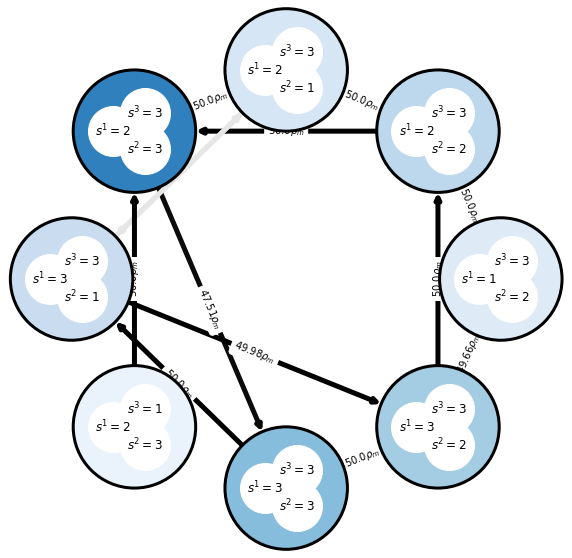

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function


from open_spiel.python.algorithms import fictitious_play
from open_spiel.python.egt import alpharank
from open_spiel.python.egt import alpharank_visualizer
from open_spiel.python.egt import utils
import pyspiel


def get_kuhn_poker_data(num_players=3):
  """Returns the kuhn poker data for the number of players specified."""
  game = pyspiel.load_game('kuhn_poker', {'players': num_players})
  xfp_solver = fictitious_play.XFPSolver(game, save_oracles=True)
  for _ in range(3):
    xfp_solver.iteration()

  # Results are seed-dependent, so show some interesting cases
  if num_players == 2:
    meta_games = xfp_solver.get_empirical_metagame(100, seed=1)
  elif num_players == 3:
    meta_games = xfp_solver.get_empirical_metagame(100, seed=5)
  elif num_players == 4:
    meta_games = xfp_solver.get_empirical_metagame(100, seed=2)

  # Metagame utility matrices for each player
  payoff_tables = []
  for i in range(num_players):
    payoff_tables.append(meta_games[i])
  return payoff_tables


# Construct meta-game payoff tables
payoff_tables = get_kuhn_poker_data()
payoffs_are_hpt_format = utils.check_payoffs_are_hpt(payoff_tables)
strat_labels = utils.get_strat_profile_labels(payoff_tables,
                                              payoffs_are_hpt_format)

# Run AlphaRank
rhos, rho_m, pi, _, _ = alpharank.compute(payoff_tables, alpha=1e2)

# Report & plot results
alpharank.print_results(
    payoff_tables, payoffs_are_hpt_format, rhos=rhos, rho_m=rho_m, pi=pi)
utils.print_rankings_table(payoff_tables, pi, strat_labels)
m_network_plotter = alpharank_visualizer.NetworkPlot(
    payoff_tables, rhos, rho_m, pi, strat_labels, num_top_profiles=8)
m_network_plotter.compute_and_draw_network()

In [ ]:
# Load the game
from open_spiel.python.algorithms import fictitious_play
from open_spiel.python.egt import alpharank
from open_spiel.python.egt import alpharank_visualizer
from open_spiel.python.egt import heuristic_payoff_table
from open_spiel.python.egt import utils
import pyspiel

game = pyspiel.load_matrix_game("matrix_rps")
payoff_tables = utils.game_payoffs_array(game)

def game_payoffs_array(game):
  """Returns a `numpy.ndarray` of utilities for a game.

  NOTE: if the game is not a MatrixGame or a TensorGame then this may be costly.

  Args:
    game: A game.

  Returns:
    `numpy.ndarray` of dimension `num_players` + 1.
    First dimension is the player, followed by the actions of all players, e.g.
    a 3x3 game (2 players) has dimension [2,3,3].
  """
  if isinstance(game, pyspiel.MatrixGame):
    return np.stack([game.row_utilities(), game.col_utilities()])

  if not isinstance(game, pyspiel.TensorGame):
    game = pyspiel.extensive_to_tensor_game(game)
  return np.stack(
      [game.player_utilities(player) for player in range(game.num_players())])

print(payoff_tables)

# Convert to heuristic payoff tables
payoff_tables= [heuristic_payoff_table.from_matrix_game(payoff_tables[0]),
                heuristic_payoff_table.from_matrix_game(payoff_tables[1].T)]

# Check if the game is symmetric (i.e., players have identical strategy sets
# and payoff tables) and return only a single-player’s payoff table if so.
# This ensures Alpha-Rank automatically computes rankings based on the
# single-population dynamics.
_, payoff_tables = utils.is_symmetric_matrix_game(payoff_tables)

# Compute Alpha-Rank
(rhos, rho_m, pi, num_profiles, num_strats_per_population) = alpharank.compute(
    payoff_tables, alpha=1e2)

# Report results
alpharank.print_results(payoff_tables, payoffs_are_hpt_format, pi=pi)

[[[ 0. -1.  1.]
  [ 1.  0. -1.]
  [-1.  1.  0.]]

 [[ 0.  1. -1.]
  [-1.  0.  1.]
  [ 1. -1.  0.]]]


/usr/local/lib/python3.7/dist-packages/open_spiel/python/egt/alpharank.py:164: RuntimeWarning: overflow encountered in exp
  result = (1 - np.exp(-u)) / (1 - np.exp(-m * u))


NameError: ignored

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from open_spiel.python.egt import heuristic_payoff_table


def get_kuhn_poker_data(num_players=3):
  """Returns the kuhn poker data for the number of players specified."""
  game = pyspiel.load_game('kuhn_poker', {'players': num_players})
  xfp_solver = fictitious_play.XFPSolver(game, save_oracles=True)
  for _ in range(3):
    xfp_solver.iteration()

  # Results are seed-dependent, so show some interesting cases
  if num_players == 2:
    meta_games = xfp_solver.get_empirical_metagame(100, seed=1)
  elif num_players == 3:
    meta_games = xfp_solver.get_empirical_metagame(100, seed=5)
  elif num_players == 4:
    meta_games = xfp_solver.get_empirical_metagame(100, seed=2)

  # Metagame utility matrices for each player
  payoff_tables = []
  for i in range(num_players):
    payoff_tables.append(meta_games[i])
  return payoff_tables


def iterated_prisoners_dilemma_data(num_players=3):
  game = pyspiel.load_game("python_iterated_prisoners_dilemma")
  turn_based = pyspiel.convert_to_turn_based(game)
  xfp_solver = fictitious_play.XFPSolver(turn_based, save_oracles=True)
  
  for _ in range(3):
    print(1)
    xfp_solver.iteration()

  # Results are seed-dependent, so show some interesting cases
  if num_players == 2:
    meta_games = xfp_solver.get_empirical_metagame(100, seed=1)
  elif num_players == 3:
    meta_games = xfp_solver.get_empirical_metagame(100, seed=5)
  elif num_players == 4:
    meta_games = xfp_solver.get_empirical_metagame(100, seed=2)

  # Metagame utility matrices for each player
  payoff_tables = []
  for i in range(num_players):
    payoff_tables.append(meta_games[i])
  return payoff_tables

payoff_tables = iterated_prisoners_dilemma_data()
# Convert to heuristic payoff tables
payoff_tables= [heuristic_payoff_table.from_matrix_game(payoff_tables[0]),
                heuristic_payoff_table.from_matrix_game(payoff_tables[1].T)]

# Check if the game is symmetric (i.e., players have identical strategy sets
# and payoff tables) and return only a single-player’s payoff table if so.
# This ensures Alpha-Rank automatically computes rankings based on the
# single-population dynamics.
# _, payoff_tables = utils.is_symmetric_matrix_game(payoff_tables)
payoffs_are_hpt_format = utils.check_payoffs_are_hpt(payoff_tables)

# Compute Alpha-Rank
(rhos, rho_m, pi, num_profiles, num_strats_per_population) = alpharank.compute(
    payoff_tables, alpha=1e2)

# Report results
# alpharank.print_results(payoff_tables, payoffs_are_hpt_format, pi=pi)

# # Construct meta-game payoff tables
# payoff_tables = get_predator_prey_data()
# payoffs_are_hpt_format = utils.check_payoffs_are_hpt(payoff_tables)
strat_labels = utils.get_strat_profile_labels(payoff_tables,
                                              payoffs_are_hpt_format)

# Report & plot results
alpharank.print_results(
    payoff_tables, payoffs_are_hpt_format, rhos=rhos, rho_m=rho_m, pi=pi)
utils.print_rankings_table(payoff_tables, pi, strat_labels)
m_network_plotter = alpharank_visualizer.NetworkPlot(
    payoff_tables, rhos, rho_m, pi, strat_labels, num_top_profiles=8)
m_network_plotter.compute_and_draw_network()

1


KeyError: ignored

In [ ]:
# Load the game
from open_spiel.python.mfg.games import predator_prey

def get_predator_prey_data(num_players=3):
  game = pyspiel.load_game('python_mfg_predator_prey')
  xfp_solver = fictitious_play.XFPSolver(game, save_oracles=True)
  
  for _ in range(3):
    xfp_solver.iteration()

  # Results are seed-dependent, so show some interesting cases
  if num_players == 2:
    meta_games = xfp_solver.get_empirical_metagame(100, seed=1)
  elif num_players == 3:
    meta_games = xfp_solver.get_empirical_metagame(100, seed=5)
  elif num_players == 4:
    meta_games = xfp_solver.get_empirical_metagame(100, seed=2)

  # Metagame utility matrices for each player
  payoff_tables = []
  for i in range(num_players):
    payoff_tables.append(meta_games[i])
  return payoff_tables

payoff_tables = get_predator_prey_data()

# Convert to heuristic payoff tables
payoff_tables= [heuristic_payoff_table.from_matrix_game(payoff_tables[0]),
                heuristic_payoff_table.from_matrix_game(payoff_tables[1].T)]

# Check if the game is symmetric (i.e., players have identical strategy sets
# and payoff tables) and return only a single-player’s payoff table if so.
# This ensures Alpha-Rank automatically computes rankings based on the
# single-population dynamics.
_, payoff_tables = utils.is_symmetric_matrix_game(payoff_tables)

# Compute Alpha-Rank
(rhos, rho_m, pi, num_profiles, num_strats_per_population) = alpharank.compute(
    payoff_tables, alpha=1e2)

# Report results
alpharank.print_results(payoff_tables, payoffs_are_hpt_format, pi=pi)

0


RecursionError: ignored